In [31]:
import requests
from bs4 import BeautifulSoup
import random

title = "Analyst"
location = "New Zealand"
base_url = "https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search"
job_ids = []

for start in range(0, 300, 10): 
    list_url = f"{base_url}?keywords={title}&location={location}&start={start}"
    response = requests.get(list_url)
    if response.status_code != 200:
        print(f"Failed at start={start}")
        break
    soup = BeautifulSoup(response.text, "html.parser")
    job_cards = soup.find_all("li")

    for job in job_cards:
        base_card_div = job.find("div", {"class": "base-card"})
        if base_card_div:
            try:
                urn = base_card_div.get("data-entity-urn")
                job_id = urn.split(":")[3]
                job_ids.append(job_id)
            except Exception:
                continue

print(f"Collected {len(job_ids)} job IDs.")


Collected 300 job IDs.


In [33]:
print(job_ids)

['4169059956', '4217559544', '4212548969', '4094672983', '4044060537', '4217598319', '4185733541', '4166952865', '4212548477', '4122033396', '4185838992', '4216393915', '4178416036', '4211039336', '4028570377', '4212895959', '4196290269', '4215406473', '4217286143', '4222667156', '4220733124', '4226754012', '4216312992', '4226756295', '4216397283', '4094677164', '4206134085', '4160834557', '4226756034', '4177294874', '4226138607', '4119722708', '4227076500', '4217286155', '4101139451', '4122031542', '4203881213', '4091408730', '4223843807', '4221212257', '4218693826', '4069836413', '4195412363', '4226743940', '4102275013', '4185452404', '4128059863', '4216107814', '4102269856', '4215982484', '4224085919', '4101135563', '4206304142', '4122031539', '4216020130', '4224454897', '4220972459', '4207690364', '4221357004', '4218693830', '4091413312', '4119726055', '4058292662', '4222445193', '4205103017', '4028567974', '4209920287', '4058290850', '4120550001', '4119723436', '4224229373', '4055

In [35]:
base_card_div

<div class="base-card relative w-full hover:no-underline focus:no-underline base-card--link base-search-card base-search-card--link job-search-card" data-column="1" data-entity-urn="urn:li:jobPosting:4219681999" data-impression-id="jobs-search-result-9" data-reference-id="Oqs+R3wwqW6VuaIEGCNqVg==" data-row="300" data-tracking-id="WL2tusI/BZUUV5FFNvGIbg==">
<a class="base-card__full-link absolute top-0 right-0 bottom-0 left-0 p-0 z-[2]" data-tracking-client-ingraph="" data-tracking-control-name="public_jobs_jserp-result_search-card" data-tracking-will-navigate="" href="https://nz.linkedin.com/jobs/view/work-from-home-search-analyst-new-zealand-at-telus-digital-ai-data-solutions-4219681999?position=10&amp;pageNum=29&amp;refId=Oqs%2BR3wwqW6VuaIEGCNqVg%3D%3D&amp;trackingId=WL2tusI%2FBZUUV5FFNvGIbg%3D%3D">
<span class="sr-only">
              
        
        Work From Home Search Analyst New Zealand
      
      
          </span>
</a>
<div class="search-entity-media">
<img alt="" class="

In [41]:
import time
import random

job_list = []

for job_id in job_ids:
    job_url = f"https://www.linkedin.com/jobs-guest/jobs/api/jobPosting/{job_id}"
    response = requests.get(job_url)

    if response.status_code != 200:
        print(f"Failed to fetch job {job_id}")
        continue

    soup = BeautifulSoup(response.text, "html.parser")
    job_post = {}
    try:
        job_post["job_id"] = job_id
        job_post["job_title"] = soup.find("h2", {"class": "top-card-layout__title font-sans text-lg papabear:text-xl font-bold leading-open text-color-text mb-0 topcard__title"}).text.strip()
    except:
        job_post["job_title"] = None

    try:
        job_post["company_name"] = soup.find("span", {"class": "topcard__flavor"}).text.strip()
    except:
        job_post["company_name"] = None

    try:
        job_post["time_posted"] = job_soup.find("span", {"class": "posted-time-ago__text topcard__flavor--metadata"}).text.strip()
    except:
        job_post["time_posted"] = None

    try:
        job_post["num_applicants"] = job_soup.find("span", {"class": "num-applicants__caption topcard__flavor--metadata topcard__flavor--bullet"}).text.strip()
    except:
        job_post["num_applicants"] = None

    try:
        job_post["description"] = soup.find("div", {"class": "description__text description__text--rich"})
    except:
        job_post["description"] = None

    job_list.append(job_post)
    time.sleep(random.uniform(1, 2)) 

job_list


[{'job_id': '4169059956',
  'job_title': 'Analyst / Senior Analyst - Data Analytics in M&A',
  'company_name': 'KPMG New Zealand',
  'time_posted': '1 day ago',
  'num_applicants': None,
  'description': <div class="description__text description__text--rich">
  <section class="show-more-less-html" data-max-lines="5">
  <div class="show-more-less-html__markup show-more-less-html__markup--clamp-after-5 relative overflow-hidden">
            KPMG is one of the most trusted and respected global professional services firms. Through depth of expertise, clarity of insight and strength of purpose we help our clients solve complex problems, steer change, strengthen, transition and grow.<br/><br/><strong>KPMG’s Deal Advisory</strong> team support clients with high-value strategic and financial decisions, typically in the context of M&amp;A or large-scale capital investment. We bring financial analysis, commercial acumen and market insights to deliver sound investments and fuel New Zealand’s pros

In [45]:
import pandas as pd

df = pd.DataFrame(job_list)
df

job_id                                          job_title  \
0    4169059956   Analyst / Senior Analyst - Data Analytics in M&A   
1    4217559544  Global Banking & Markets, Investment Banking, ...   
2    4212548969                                          Associate   
3    4094672983                      Work from Home in New Zealand   
4    4044060537                       Work From Home - New Zealand   
..          ...                                                ...   
295  4219673763          Work From Home Search Analyst New Zealand   
296  4223679505                              Senior System Analyst   
297  4217564424          Work From Home Search Analyst New Zealand   
298  4217560756          Work From Home Search Analyst New Zealand   
299  4219681999          Work From Home Search Analyst New Zealand   

                        company_name time_posted num_applicants  \
0                   KPMG New Zealand   1 day ago           None   
1                      Goldman Sachs   1 day ago           None   
2                 McKinsey & Company   1 day ago           None   
3                      TELUS Digital   1 day ago           None   
4                      TELUS Digital   1 day ago           None   
..                               ...         ...            ...   
295  TELUS Digital AI Data Solutions   1 day ago           None   
296                  ACC New Zealand   1 day ago           None   
297  TELUS Digital AI Data Solutions   1 day ago           None   
298  TELUS Digital AI Data Solutions   1 day ago           None   
299  TELUS Digital AI Data Solutions   1 day ago           None   

                                           description  
0    [\n, [\n, [\n          KPMG is one of the most...  
1    [\n, [\n, [\n, <strong>Job Description<br/><br...  
2    [\n, [\n, [\n, <strong>Your Growth<br/><br/></...  
3    [\n, [\n, [\n, <p><em>Ready to ditch the tradi...  
4    [\n, [\n, [\n, <p><em>Ready to ditch the tradi...  
..                                                 ...  
295  [\n, [\n, [\n, <p>Ready to ditch the tradition...  
296  [\n, [\n, [\n, <strong>Mō mātou | About us </s...  
297  [\n, [\n, [\n, <p>Ready to ditch the tradition...  
298  [\n, [\n, [\n, <p>Ready to ditch the tradition...  
299  [\n, [\n, [\n, <p>Ready to ditch the tradition...  

[300 rows x 6 columns]

### Data Cleaning

In [53]:
# to extract only the num of applicants and the time posted. 
# df['new_time_posted'] = df['time_posted'].str.extract(r'(\d+)')

del df['time_posted']
del df['num_applicants']
print(df)

         job_id                                          job_title  \
0    4169059956   Analyst / Senior Analyst - Data Analytics in M&A   
1    4217559544  Global Banking & Markets, Investment Banking, ...   
2    4212548969                                          Associate   
3    4094672983                      Work from Home in New Zealand   
4    4044060537                       Work From Home - New Zealand   
..          ...                                                ...   
295  4219673763          Work From Home Search Analyst New Zealand   
296  4223679505                              Senior System Analyst   
297  4217564424          Work From Home Search Analyst New Zealand   
298  4217560756          Work From Home Search Analyst New Zealand   
299  4219681999          Work From Home Search Analyst New Zealand   

                        company_name  \
0                   KPMG New Zealand   
1                      Goldman Sachs   
2                 McKinsey & Company   

In [77]:
# Sort by company
df_sorted = df.sort_values(by=['company_name', 'job_title']).reset_index(drop=True)
df_sorted.index = df_sorted.index + 1
df_sorted = df_sorted[['job_id', 'company_name', 'job_title', 'description']]

# Renaming col names
df_sorted = df_sorted.rename(columns={
    'job_id': 'Job ID',
    'company_name': 'Company',
    'job_title': 'Job Title',
    'description': 'Description'
})

df_sorted

Job ID                                          Company  \
1    4217746902                                  ACC New Zealand   
2    4218917081                                  ACC New Zealand   
3    4218590235                                  ACC New Zealand   
4    4223679505                                  ACC New Zealand   
5    4218982000                                              AIG   
6    4069285085                                             AKQA   
7    4071199227                                             AKQA   
8    4228085489                                              ANZ   
9    4214698432                                              ANZ   
10   4224813750                                              ANZ   
11   4219479190                                              ANZ   
12   4222667156                                         ASB Bank   
13   4223872415                                         ASB Bank   
14   4223872415                                         ASB Bank   
15   4218219082                                         ASB Bank   
16   4220733124                                  Air New Zealand   
17   4222618557                                  Air New Zealand   
18   4187871679                                              Aon   
19   4185452404                                              Aon   
20   4215097182                                              Aon   
21   4185946722                                   Apex Group Ltd   
22   4195412363                                   Apex Group Ltd   
23   4215569738                                          Argenta   
24   4223336222                                  Asahi Beverages   
25   4216312992                                          Atturra   
26   4215068807                               Auckland Transport   
27   4217143286                                             Beca   
28   4208868594                    Boston Consulting Group (BCG)   
29   4205103017                                            CORDE   
30   4206924272                              Campbell MacPherson   
31   4205736342                                             Cin7   
32   4220666636          Civil Aviation Authority of New Zealand   
33   4222031469                        Climate Change Commission   
34   4187768767                                        Cognizant   
35   4221076005                              Cushman & Wakefield   
36   4221076005                              Cushman & Wakefield   
37   4221164443                                             DKSH   
38   4216489419                                        DLA Piper   
39   4213164787                                              DLL   
40   4226138607                                           Danone   
41   4220589358                                   DataAnnotation   
42   4120550001                                   DataAnnotation   
43   4200959975                                   DataAnnotation   
44   4200959975                                   DataAnnotation   
45   4218575002                                   DataAnnotation   
46   4218575304                                   DataAnnotation   
47   4218581108                                   DataAnnotation   
48   4218576567                                   DataAnnotation   
49   4220592509                                   DataAnnotation   
50   4204261986                                          Datacom   
51   4204268058                                          Datacom   
52   4205517211                                         Deloitte   
53   4227894864                                         Deloitte   
54   4225924955                                         Deloitte   
55   4225927601                                         Deloitte   
56   4203881213                                         Deloitte   
57   4225932021                                         Deloitte   
58   4223273093                     Department of Corrections NZ 

In [83]:
# Remove HTML tags
import re

df_sorted['Description'] = df_sorted['Description'].astype(str)
df_sorted['Description'] = df_sorted['Description'].apply(lambda x: re.sub(r'<[^>]+>', '', x))  
df_sorted['Description'] = df_sorted['Description'].str.replace(r'\s+', ' ', regex=True).str.strip()
df_sorted


Job ID                                          Company  \
1    4217746902                                  ACC New Zealand   
2    4218917081                                  ACC New Zealand   
3    4218590235                                  ACC New Zealand   
4    4223679505                                  ACC New Zealand   
5    4218982000                                              AIG   
6    4069285085                                             AKQA   
7    4071199227                                             AKQA   
8    4228085489                                              ANZ   
9    4214698432                                              ANZ   
10   4224813750                                              ANZ   
11   4219479190                                              ANZ   
12   4222667156                                         ASB Bank   
13   4223872415                                         ASB Bank   
14   4223872415                                         ASB Bank   
15   4218219082                                         ASB Bank   
16   4220733124                                  Air New Zealand   
17   4222618557                                  Air New Zealand   
18   4187871679                                              Aon   
19   4185452404                                              Aon   
20   4215097182                                              Aon   
21   4185946722                                   Apex Group Ltd   
22   4195412363                                   Apex Group Ltd   
23   4215569738                                          Argenta   
24   4223336222                                  Asahi Beverages   
25   4216312992                                          Atturra   
26   4215068807                               Auckland Transport   
27   4217143286                                             Beca   
28   4208868594                    Boston Consulting Group (BCG)   
29   4205103017                                            CORDE   
30   4206924272                              Campbell MacPherson   
31   4205736342                                             Cin7   
32   4220666636          Civil Aviation Authority of New Zealand   
33   4222031469                        Climate Change Commission   
34   4187768767                                        Cognizant   
35   4221076005                              Cushman & Wakefield   
36   4221076005                              Cushman & Wakefield   
37   4221164443                                             DKSH   
38   4216489419                                        DLA Piper   
39   4213164787                                              DLL   
40   4226138607                                           Danone   
41   4220589358                                   DataAnnotation   
42   4120550001                                   DataAnnotation   
43   4200959975                                   DataAnnotation   
44   4200959975                                   DataAnnotation   
45   4218575002                                   DataAnnotation   
46   4218575304                                   DataAnnotation   
47   4218581108                                   DataAnnotation   
48   4218576567                                   DataAnnotation   
49   4220592509                                   DataAnnotation   
50   4204261986                                          Datacom   
51   4204268058                                          Datacom   
52   4205517211                                         Deloitte   
53   4227894864                                         Deloitte   
54   4225924955                                         Deloitte   
55   4225927601                                         Deloitte   
56   4203881213                                         Deloitte   
57   4225932021                                         Deloitte   
58   4223273093                     Department of Corrections NZ 

In [92]:

pd.reset_option('display.max_colwidth', None)
print(df_sorted.iloc[5]['Description'])  
print(df_sorted.loc[13]['Description'])  


Analytics is one of AKQA's fastest-growing disciplines, with executive support, a global team, a big data stack, and broad capabilities—including user-experience insight and applied machine learning. Our clients are building the future of their businesses, and more than ever, data is at the heart of creating this new reality.As the Lead Data Analyst, you'll spearhead insight generation, leveraging data to tell progressive stories and drive data-informed decision-making across the organisation. You will focus on understanding key business and customer problems, identifying gaps, and providing actionable recommendations. You will help establish AKQA as a leader in the creation and deployment of data-driven insight.At AKQA, you'll work in an innovative and inclusive culture surrounded by some of the brightest minds in their fields. You'll also have the opportunity to learn and grow within a creative and technically advanced team and have access to ongoing personal and professional develop

In [106]:
# Add a Serial Number column starting from 1
#df_sorted.insert(1, 'S.No', range(1, len(df_sorted) + 1))
pd.set_option('display.max_colwidth', 50)
df_sorted.reset_index(drop=True, inplace=True)
df_sorted = df_sorted[['S.No', 'Job ID', 'Company', 'Job Title', 'Description']]

In [104]:
from IPython.display import display
display(df_sorted.style.hide(axis="index"))


### Extract Skills Using KeyBERT

In [109]:
pip install keybert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 21.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 22.1 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 25.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 43.3 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#Save data to CSV file
df_sorted.to_csv('Jobs_list.csv', index = False)

In [20]:
import pandas as pd
jobs = pd.read_csv('Jobs_list.csv')
jobs.head()


S.No      Job ID          Company                 Job Title  \
0     1  4217746902  ACC New Zealand        Compliance Analyst   
1     2  4218917081  ACC New Zealand   Senior Insights Analyst   
2     3  4218590235  ACC New Zealand  Senior Reporting Analyst   
3     4  4223679505  ACC New Zealand     Senior System Analyst   
4     5  4218982000              AIG    Underwriting Associate   

                                         Description  
0  Exciting opportunity to identify and detect ex...  
1  Mō mātou | About us ACC exists to support peop...  
2  Mō mātou | About us ACC exists to support peop...  
3  Mō mātou | About us ACC exists to support peop...  
4  At AIG, we are reimagining the way we help cus...

In [22]:
from keybert import KeyBERT
kw_model = KeyBERT()


In [24]:
# Extract keywords (top N skills)

def extract_skills(description, top_n=5):
    if pd.isna(description):
        return []  # Return an empty list if there's no description

    keywords = kw_model.extract_keywords(description, top_n=top_n)
    return [keyword[0] for keyword in keywords]  


jobs['Skills'] = jobs['Description'].apply(lambda x: extract_skills(x, top_n=7))
print(jobs['Skills'].head(10))



0    [māori, aotearoa, zealand, zealanders, waka, n...
1    [ngā, māori, waitangi, tūranga, waka, insights...
2    [māori, ngā, waka, waitangi, ōna, zealanders, ...
3    [māori, waitangi, oracle, responsibilities, wa...
4    [aig, underwriting, operationsaig, servicing, ...
5    [analytics, insights, analyticsexperience, ins...
6    [analytics, insights, analyticsexperience, ins...
7    [financial, liquidity, bank, analyst, risk, ma...
8    [roleas, role, roles, organisation, associate,...
9    [banking, bank, transactions, merchant, transa...
Name: Skills, dtype: object


In [30]:
import re

# A simple list of known data/tech skills – expand as needed
skills_list = [
    "excel", "microsoft excel", "vba", "access", "sql", "postgresql", "mysql", "oracle",
    "python", "r", "sas", "matlab", "java", "scala",
    "power bi", "tableau", "looker", "qlikview", "google data studio", "dash", "plotly",
    "jupyter", "pandas", "numpy", "matplotlib", "seaborn", "scikit-learn",
    "statistics", "data visualization", "data wrangling", "data cleaning", "data mining", "elt", 
    "data analysis", "data modeling", "forecasting", "predictive analytics", "descriptive analytics",
    "etl", "sql server integration services", "ssrs", "ssis", "airflow", "snowflake", "redshift", "bigquery",
    "powerpoint", "word", "outlook", "jira", "confluence", "bitbucket", "github", "git", 
    "google analytics", "tag manager", "crm", "erp", "sap", "netsuite", "machine learning", "natural language processing", "classification", "regression", "clustering", 
    "aws", "azure", "gcp", "cloud computing", "api", "rest", "json", "xml"
]

# 2. Normalize and clean the description
def clean_text(text):
    if pd.isna(text):
        return ''
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)  # remove HTML
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation/numbers
    return text

jobs['Cleaned_Description'] = jobs['Description'].apply(clean_text)

# 3. Match skills using keyword lookup
def find_skills(text, skills_list):
    found = []
    for skill in skills_list:
        if re.search(rf'\b{re.escape(skill)}\b', text):
            found.append(skill)
    return found

jobs['Required_Skills'] = jobs['Cleaned_Description'].apply(lambda x: find_skills(x, skills_list))

In [32]:
jobs


S.No      Job ID                           Company  \
0       1  4217746902                   ACC New Zealand   
1       2  4218917081                   ACC New Zealand   
2       3  4218590235                   ACC New Zealand   
3       4  4223679505                   ACC New Zealand   
4       5  4218982000                               AIG   
..    ...         ...                               ...   
295   296  4113724028  ZIM Integrated Shipping Services   
296   297  4223238170                            Zip Co   
297   298  4223238170                            Zip Co   
298   299  4210945355                           emagine   
299   300  4221212257                            illion   

                                             Job Title  \
0                                   Compliance Analyst   
1                              Senior Insights Analyst   
2                             Senior Reporting Analyst   
3                                Senior System Analyst   
4                               Underwriting Associate   
..                                                 ...   
295                            Senior Business Analyst   
296  Merchant Engagement Specialist/Partner Success...   
297  Merchant Engagement Specialist/Partner Success...   
298               KYC Analyst / Senior Analyst (m/f/d)   
299                         Technical Business Analyst   

                                           Description  \
0    Exciting opportunity to identify and detect ex...   
1    Mō mātou | About us ACC exists to support peop...   
2    Mō mātou | About us ACC exists to support peop...   
3    Mō mātou | About us ACC exists to support peop...   
4    At AIG, we are reimagining the way we help cus...   
..                                                 ...   
295  About ZIMZIM is a leading global container lin...   
296  Be the first point of call for Zip MerchantsPr...   
297  Be the first point of call for Zip MerchantsPr...   
298  Job Title: KYC Analyst / Senior AnalystLocatio...   
299  illion is the leading provider of trusted data...   

                                                Skills  \
0    [māori, aotearoa, zealand, zealanders, waka, n...   
1    [ngā, māori, waitangi, tūranga, waka, insights...   
2    [māori, ngā, waka, waitangi, ōna, zealanders, ...   
3    [māori, waitangi, oracle, responsibilities, wa...   
4    [aig, underwriting, operationsaig, servicing, ...   
..                                                 ...   
295  [zim, zimzim, logistics, role, agile, analyst,...   
296  [merchantsprovide, merchant, merchants, ecomme...   
297  [merchantsprovide, merchant, merchants, ecomme...   
298  [kyc, consultancy, qualifications, analyst, co...   
299  [client, clients, illion, services, consultant...   

                                   Cleaned_Description  \
0    exciting opportunity to identify and detect ex...   
1    m mtou  about us acc exists to support people ...   
2    m mtou  about us acc exists to support people ...   
3    m mtou  about us acc exists to support people ...   
4    at aig we are reimagining the way we help cust...   
..                                                 ...   
295  about zimzim is a leading global container lin...   
296  be the first point of call for zip merchantspr...   
297  be the first point of call for zip merchantspr...   
298  job title kyc analyst  senior analystlocation ...   
299  illion is the leading provider of trusted data...   

                                   Required_Skills  
0               [sql, python, r, machine learning]  
1    [sql, r, power bi, statistics, data analysis]  
2       [sql, oracle, r, power bi, etl, snowflake]  
3                                 [sql, oracle, r]  
4                                    [excel, word]  
..                                             ...  
295                        [sql, python, power bi]  
296                                  [access, crm]  
297                            

In [34]:
del jobs['Skills']
jobs = jobs[['S.No', 'Job ID', 'Company', 'Job Title', 'Required_Skills', 'Description', 'Cleaned_Description']]


In [44]:
from IPython.display import display
display(jobs.style.hide(axis="index"))
jobs

S.No      Job ID                           Company  \
0       1  4217746902                   ACC New Zealand   
1       2  4218917081                   ACC New Zealand   
2       3  4218590235                   ACC New Zealand   
3       4  4223679505                   ACC New Zealand   
4       5  4218982000                               AIG   
..    ...         ...                               ...   
295   296  4113724028  ZIM Integrated Shipping Services   
296   297  4223238170                            Zip Co   
297   298  4223238170                            Zip Co   
298   299  4210945355                           emagine   
299   300  4221212257                            illion   

                                             Job Title  \
0                                   Compliance Analyst   
1                              Senior Insights Analyst   
2                             Senior Reporting Analyst   
3                                Senior System Analyst   
4                               Underwriting Associate   
..                                                 ...   
295                            Senior Business Analyst   
296  Merchant Engagement Specialist/Partner Success...   
297  Merchant Engagement Specialist/Partner Success...   
298               KYC Analyst / Senior Analyst (m/f/d)   
299                         Technical Business Analyst   

                                   Required_Skills  \
0               [sql, python, r, machine learning]   
1    [sql, r, power bi, statistics, data analysis]   
2       [sql, oracle, r, power bi, etl, snowflake]   
3                                 [sql, oracle, r]   
4                                    [excel, word]   
..                                             ...   
295                        [sql, python, power bi]   
296                                  [access, crm]   
297                                  [access, crm]   
298                                             []   
299                                             []   

                                           Description  \
0    Exciting opportunity to identify and detect ex...   
1    Mō mātou | About us ACC exists to support peop...   
2    Mō mātou | About us ACC exists to support peop...   
3    Mō mātou | About us ACC exists to support peop...   
4    At AIG, we are reimagining the way we help cus...   
..                                                 ...   
295  About ZIMZIM is a leading global container lin...   
296  Be the first point of call for Zip MerchantsPr...   
297  Be the first point of call for Zip MerchantsPr...   
298  Job Title: KYC Analyst / Senior AnalystLocatio...   
299  illion is the leading provider of trusted data...   

                                   Cleaned_Description  
0    exciting opportunity to identify and detect ex...  
1    m mtou  about us acc exists to support people ...  
2    m mtou  about us acc exists to support people ...  
3    m mtou  about us acc exists to support people ...  
4    at aig we are reimagining the way we help cust...  
..                                                 ...  
295  about zimzim is a leading global container lin...  
296  be the first point of call for zip merchantspr...  
297  be the first point of call for zip merchantspr...  
298  job title kyc analyst  senior analystlocation ...  
299  illion is the leading provider of trusted data...  

[300 rows x 7 columns]

## Data Visualization

#### 1. Top Required Skills overall
#### 2. Skill distribution by company
#### 3. Job Titles associated with specific skills
#### 4. Skill Heatmap

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

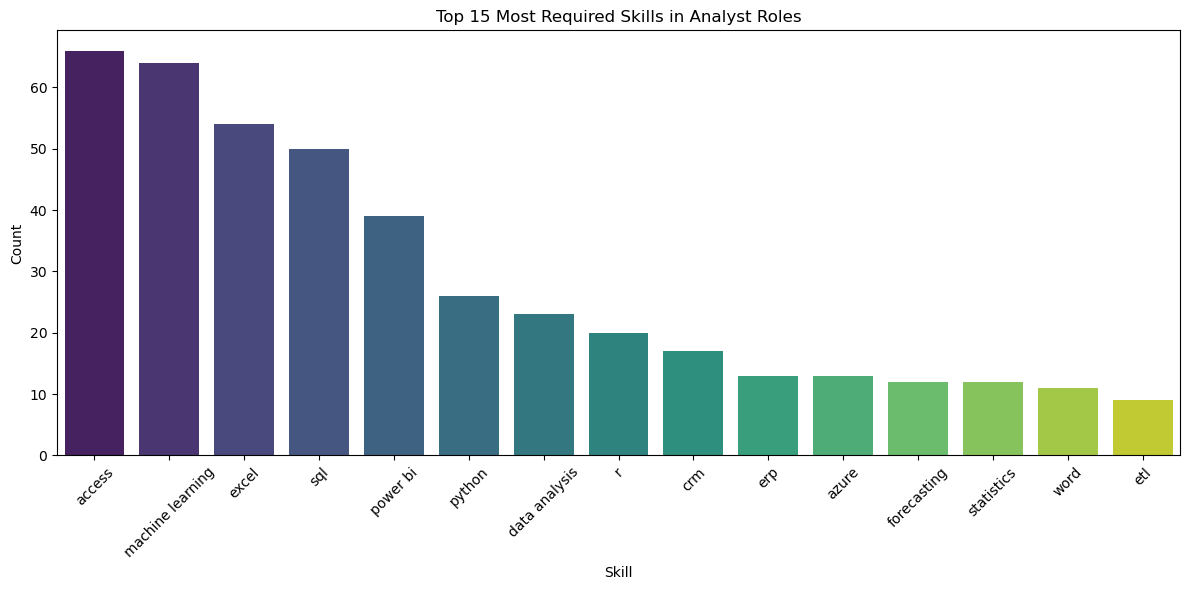

In [50]:
# single iterable list of all skills across all rows
import itertools
from collections import Counter

skills = list(itertools.chain.from_iterable(jobs['Required_Skills']))
skills_counts = Counter(skills)

skill_df = pd.DataFrame(skills_counts.items(), columns = ['Skill', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=skill_df.head(15), x='Skill', y='Count', palette='viridis')
plt.title('Top 15 Most Required Skills in Analyst Roles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

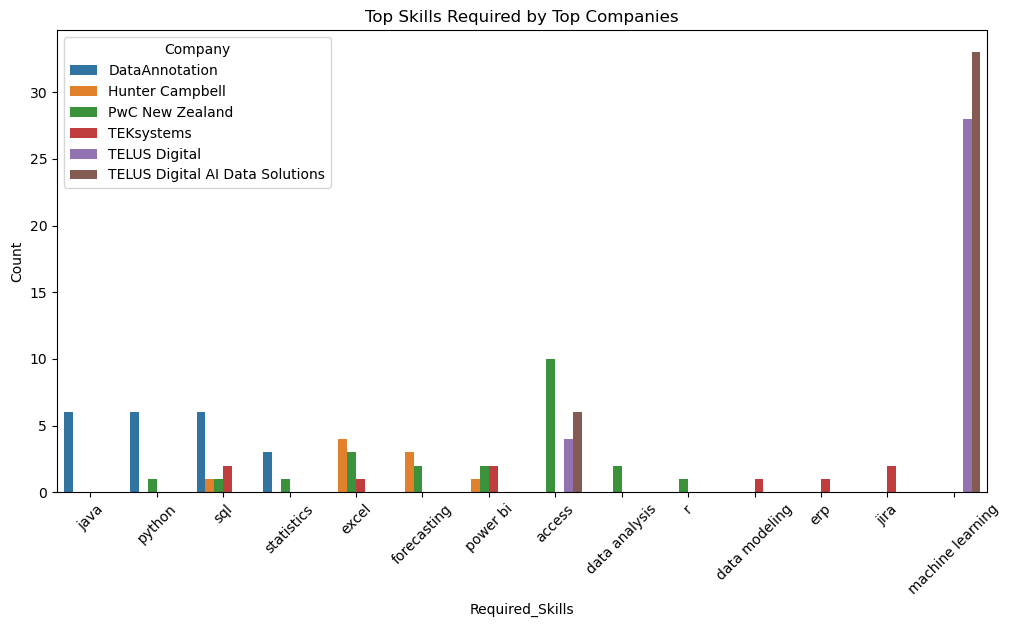

In [76]:
# Explode to get one skill per row
df_exploded = jobs.explode('Required_Skills')

# Count
company_skill_counts = df_exploded.groupby(['Company', 'Required_Skills']).size().reset_index(name='Count')

# Plot top companies
top_companies = jobs['Company'].value_counts().head(6).index.tolist()
filtered = company_skill_counts[company_skill_counts['Company'].isin(top_companies)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x='Required_Skills', y='Count', hue='Company')
plt.title('Top Skills Required by Top Companies')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.show()


In [56]:
skill = "sql"
titles_for_skill = jobs[jobs['Required_Skills'].apply(lambda skills: skill in skills)]['Job Title'].value_counts()

# Display top 10 titles
print(titles_for_skill.head(10))

Job Title
Programming Analyst                    6
Data Analyst                           5
Senior Business Analyst                3
Senior Sales Operations Analyst        2
Data & Analytics Senior Consultant     2
Test Analyst                           2
Senior Technical Analyst - Health      2
Reporting and Data Insights Analyst    1
Commercial Analyst – Cloud & SaaS      1
Planning & Performance Analyst         1
Name: count, dtype: int64


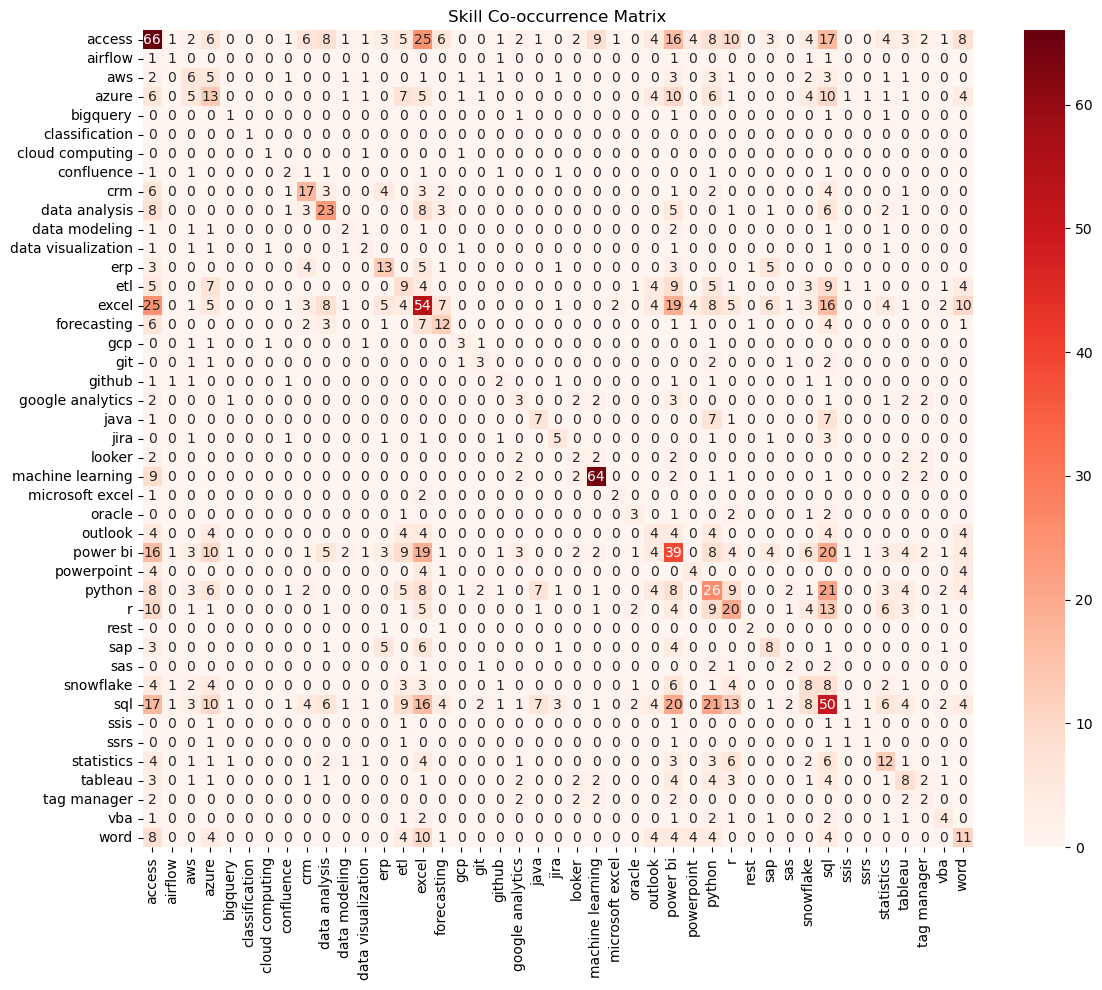

In [64]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
skill_matrix = pd.DataFrame(mlb.fit_transform(jobs['Required_Skills']), columns=mlb.classes_)
co_occurrence = skill_matrix.T.dot(skill_matrix)

plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence, cmap='Reds', annot=True, fmt='d')
plt.title('Skill Co-occurrence Matrix')
plt.tight_layout()
plt.show()


In [96]:
### Cleaned dataset for tableau visualizations

df_jobs = df_exploded.copy()

# Ensuring cols are properly named and types are correct
df_exploded.columns


Index(['S.No', 'Job ID', 'Company', 'Job Title', 'Required_Skills',
       'Description', 'Cleaned_Description'],
      dtype='object')

In [98]:
df_jobs.to_csv("jobs_cleaned_2.csv", index=False)

In [89]:
df_exploded

S.No      Job ID          Company  \
0       1  4217746902  ACC New Zealand   
0       1  4217746902  ACC New Zealand   
0       1  4217746902  ACC New Zealand   
0       1  4217746902  ACC New Zealand   
1       2  4218917081  ACC New Zealand   
..    ...         ...              ...   
296   297  4223238170           Zip Co   
297   298  4223238170           Zip Co   
297   298  4223238170           Zip Co   
298   299  4210945355          emagine   
299   300  4221212257           illion   

                                             Job Title   Required_Skills  \
0                                   Compliance Analyst               sql   
0                                   Compliance Analyst            python   
0                                   Compliance Analyst                 r   
0                                   Compliance Analyst  machine learning   
1                              Senior Insights Analyst               sql   
..                                                 ...               ...   
296  Merchant Engagement Specialist/Partner Success...               crm   
297  Merchant Engagement Specialist/Partner Success...            access   
297  Merchant Engagement Specialist/Partner Success...               crm   
298               KYC Analyst / Senior Analyst (m/f/d)               NaN   
299                         Technical Business Analyst               NaN   

                                           Description  \
0    Exciting opportunity to identify and detect ex...   
0    Exciting opportunity to identify and detect ex...   
0    Exciting opportunity to identify and detect ex...   
0    Exciting opportunity to identify and detect ex...   
1    Mō mātou | About us ACC exists to support peop...   
..                                                 ...   
296  Be the first point of call for Zip MerchantsPr...   
297  Be the first point of call for Zip MerchantsPr...   
297  Be the first point of call for Zip MerchantsPr...   
298  Job Title: KYC Analyst / Senior AnalystLocatio...   
299  illion is the leading provider of trusted data...   

                                   Cleaned_Description  
0    exciting opportunity to identify and detect ex...  
0    exciting opportunity to identify and detect ex...  
0    exciting opportunity to identify and detect ex...  
0    exciting opportunity to identify and detect ex...  
1    m mtou  about us acc exists to support people ...  
..                                                 ...  
296  be the first point of call for zip merchantspr...  
297  be the first point of call for zip merchantspr...  
297  be the first point of call for zip merchantspr...  
298  job title kyc analyst  senior analystlocation ...  
299  illion is the leading provider of trusted data...  

[600 rows x 7 columns]